# CSE 510: Project 2 - Thankam Abish 
##### Data from https://kaggle.com/robikscube/hourly-energy-consumption?utm_medium=social&utm_campaign=kaggle-dataset-share&utm_source=twitter 
## PART I

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
data = pd.read_csv('AEP_hourly.csv')

In [14]:
data.head(5)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [15]:
data.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [16]:
data['Datetime'] = pd.to_datetime(data.Datetime)
data.head(5)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [17]:
data = data.sort_values(by=['Datetime'])
data.head(5)

,Datetime,AEP_MW
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0


In [18]:
data = data[(data['Datetime'] >= '2015-01-01') & (data['Datetime'] < '2016-01-01')]
display(data.head(5))
display(data.tail(5))

,Datetime,AEP_MW
81098,2015-01-01 00:00:00,16375.0
98570,2015-01-01 01:00:00,16172.0
98571,2015-01-01 02:00:00,15968.0
98572,2015-01-01 03:00:00,15749.0
98573,2015-01-01 04:00:00,15727.0


,Datetime,AEP_MW
89852,2015-12-31 19:00:00,15360.0
89853,2015-12-31 20:00:00,15030.0
89854,2015-12-31 21:00:00,14642.0
89855,2015-12-31 22:00:00,14212.0
89856,2015-12-31 23:00:00,13843.0


In [19]:
nn_data = data['AEP_MW']

In [20]:
data.set_index('Datetime', inplace=True)
data.head(5)

,AEP_MW
Datetime,
2015-01-01 00:00:00,16375.0
2015-01-01 01:00:00,16172.0
2015-01-01 02:00:00,15968.0
2015-01-01 03:00:00,15749.0
2015-01-01 04:00:00,15727.0


In [21]:
data = data.squeeze()

##### Using data for 2015 only

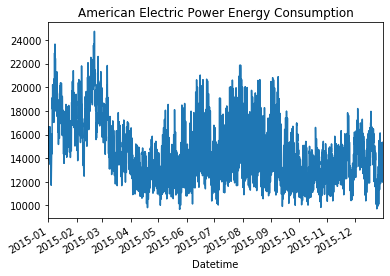

In [22]:
data.plot(title = 'American Electric Power Energy Consumption', x = 'Year', y = 'Energy Consumption ins MegaWatts (MW)')

## PART II

In [23]:
data = data.to_numpy()

In [24]:
split_mark = int(data.size*.95)
X_train = data[0:split_mark]
X_test = data[split_mark:data.size-1]

In [25]:
display(X_train.size, X_test.size)

8322

437

##### First Model: ARIMA

In [26]:
from statsmodels.tsa.arima_model import ARIMA

history = [x for x in X_train]
predictions = list()
for t in range(len(X_test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = X_test[t]
    history.append(obs)
    if t < 10:
        display('predicted=%f, expected=%f' % (yhat, obs))


'predicted=13058.682710, expected=13842.000000'

'predicted=14962.806117, expected=14066.000000'

'predicted=13911.905982, expected=13968.000000'

'predicted=13885.224677, expected=13857.000000'

'predicted=13782.677852, expected=13454.000000'

'predicted=12873.476902, expected=12641.000000'

'predicted=11866.983027, expected=11944.000000'

'predicted=11482.508599, expected=11508.000000'

'predicted=11235.640987, expected=11180.000000'

'predicted=10962.708391, expected=11096.000000'

##### Data visualization of predicted values vs expected values

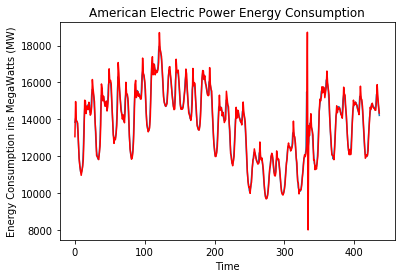

In [32]:
plt.plot(X_test)
plt.title('American Electric Power Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption ins MegaWatts (MW)')
plt.plot(predictions, color='red')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(X_test[0:50], predictions[0:50])
display('Test MSE: %.3f' % error)

'Test MSE: 130400.953'

In [34]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 8757
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -62395.326
Method:                       css-mle   S.D. of innovations            300.718
Date:                Thu, 23 Jul 2020   AIC                         124804.651
Time:                        23:28:53   BIC                         124854.195
Sample:                             1   HQIC                        124821.533
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1979      9.030     -0.022      0.983     -17.897      17.501
ar.L1.D.y      1.0184      0.011     96.767      0.000       0.998       1.039
ar.L2.D.y     -0.3016      0.015    -19.944      0.0

##### Attempted to run but much too slow, will try CCR for future projects, but for now there are two other statistical algorithms I have used.


In [ ]:
### Attempted to run but much too slow, will try CCR for future projects, but for now there are two other statistical algorithms I have used.

from statsmodels.tsa.statespace.sarimax import SARIMAX

history = [x for x in X_train]
predictions2 = list()
for t in range(len(X_test)):
    model = SARIMAX(history, order=(1, 1, 1),seasonal_order = (1, 1, 1, 24))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions2.append(yhat)
    obs = X_test[t]
    history.append(obs)
    display('predicted=%f, expected=%f' % (yhat, obs))

##### Second Model: SES

In [36]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

history = [x for x in X_train]
predictions2 = list()
for t in range(len(X_test)):
    model = SimpleExpSmoothing(history)
    model_fit = model.fit(smoothing_level=0.4)
    output = model_fit.forecast()
    yhat = output[0]
    predictions2.append(yhat)
    obs = X_test[t]
    history.append(obs)
    if t<10:
        display('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\Thank\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


'predicted=12460.184754, expected=13842.000000'

'predicted=13012.910853, expected=14066.000000'

'predicted=13434.146512, expected=13968.000000'

'predicted=13647.687907, expected=13857.000000'

'predicted=13731.412744, expected=13454.000000'

'predicted=13620.447646, expected=12641.000000'

'predicted=13228.668588, expected=11944.000000'

'predicted=12714.801153, expected=11508.000000'

'predicted=12232.080692, expected=11180.000000'

'predicted=11811.248415, expected=11096.000000'

##### Blue represents real value, and green red and purple are predicted

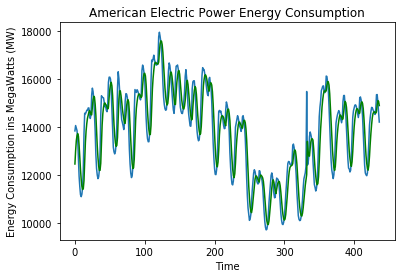

In [43]:
plt.plot(X_test)
plt.title('American Electric Power Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption ins MegaWatts (MW)')
plt.plot(predictions2, color='green')
plt.show()

In [38]:
error = mean_squared_error(X_test, predictions)
display('Test MSE: %.3f' % error)

'Test MSE: 229547.424'

In [39]:
print(model_fit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                 8758
Model:             SimpleExpSmoothing   SSE                     9544808535.517
Optimized:                       True   AIC                         121753.691
Trend:                           None   BIC                         121767.846
Seasonal:                        None   AICC                        121753.695
Seasonal Periods:                None   Date:                 Thu, 23 Jul 2020
Box-Cox:                        False   Time:                         23:31:50
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4000000                alpha                False
initial_level              16143.093                

##### Third Model: HWES

In [40]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.holtwinters import ExponentialSmoothing

history = [x for x in X_train]
predictions3 = list()
display('Showing first 10 predictions with expected values')
for t in range(len(X_test)):
    #model = ExponentialSmoothing(history)
    model = ExponentialSmoothing(history, seasonal = 'add', seasonal_periods=24)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions3.append(yhat)
    obs = X_test[t]
    history.append(obs)
    if t < 10:
        display('predicted=%f, expected=%f' % (yhat, obs))

'Showing first 10 predictions with expected values'

'predicted=13774.561244, expected=13842.000000'

'predicted=14158.014218, expected=14066.000000'

'predicted=14186.632818, expected=13968.000000'

'predicted=14033.537917, expected=13857.000000'

'predicted=13531.325356, expected=13454.000000'

'predicted=12788.465390, expected=12641.000000'

'predicted=11875.797707, expected=11944.000000'

'predicted=11315.567647, expected=11508.000000'

'predicted=11148.843980, expected=11180.000000'

'predicted=11057.834453, expected=11096.000000'

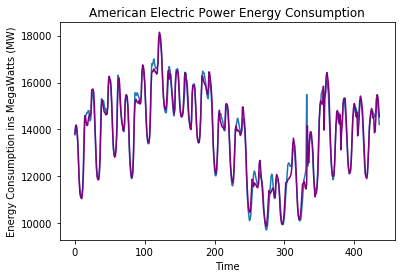

In [44]:
plt.plot(X_test)
plt.title('American Electric Power Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption ins MegaWatts (MW)')
plt.plot(predictions3, color='purple')
plt.show()

In [45]:
error = mean_squared_error(X_test, predictions)
display('Test MSE: %.3f' % error)

'Test MSE: 229547.424'

In [46]:
print(model_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                 8758
Model:             ExponentialSmoothing   SSE                      776092581.021
Optimized:                         True   AIC                          99823.657
Trend:                             None   BIC                         100007.678
Seasonal:                      Additive   AICC                         99823.843
Seasonal Periods:                    24   Date:                 Thu, 23 Jul 2020
Box-Cox:                          False   Time:                         23:34:59
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7368421                alpha                 True
smoothing_seasonal       

##### Since MSE is difficult to interpret I have graphed all the models' predictions along with the expected values for a small number of test points

##### Blue = expected
##### Red = ARIMA
##### Green = SES
##### Purple = HWES

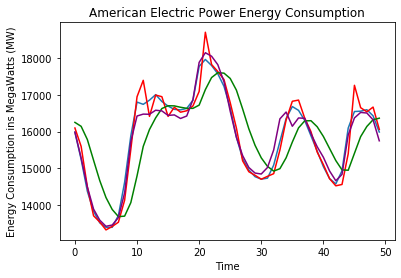

In [49]:
plt.plot(X_test[100:150])
plt.title('American Electric Power Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption ins MegaWatts (MW)')
plt.plot(predictions[100:150], color='red')
plt.plot(predictions2[100:150], color='green')
plt.plot(predictions3[100:150], color='purple')
plt.show()

##### As you can see, ARIMA performs the best among these models while SES is very influenced by the previous value and HWES is just as accurate.

## PART III

##### Since I was having a lot of difficult creating successful neural networks, I decided to remove seasonality to make the data more stationary, but this did not change much in terms of train/test loss and error.

##### The plot shows the data after seasonality has been removed

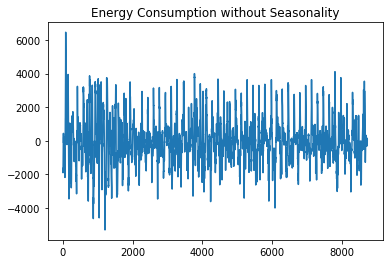

In [54]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import BatchNormalization, LeakyReLU
from keras.callbacks import ReduceLROnPlateau

nn = nn_data.values
diff = list()
hours_in_day = 24
for i in range(hours_in_day, len(nn)):
    value = nn[i] - nn[i - hours_in_day]
    diff.append(value)
plt.plot(diff)
plt.title('Energy Consumption without Seasonality')
plt.show()

##### Since the data is univariate, I have made it multivariate with X representing 3 past values and Y being the current value for energy consumption. I believed this would create a better model

In [55]:
def uni_to_mult(data, in_, out_):
    X, Y = np.empty((0,in_), float), np.array([])
    for i in range(len(data)):
        end_ix = i + in_
        out_end_ix = end_ix + out_
        if out_end_ix > len(data):
            break
        seq_x, seq_y = np.array([data[i:end_ix]]), data[end_ix:out_end_ix]
        X = np.append(X, seq_x, axis=0)
        Y = np.concatenate((Y, seq_y))
    return array(X), array(Y)
 
_in, _out = 3, 1
X, Y = uni_to_mult(diff, _in, _out)
dataset, ignore = uni_to_mult(diff, 4, 1)

In [56]:
split_mark = int(X.shape[0]*.95)
X_train = X[0:split_mark]
Y_train = Y[0:split_mark]
X_test = X[split_mark:X.shape[0]-1]
Y_test = Y[split_mark:Y.shape[0]-1]

##### I decided to vary the data by activation function
##### First MLP: Linear Activation

In [57]:
model = Sequential()
model.add(Dense(12, activation = 'linear', input_dim = 3))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [58]:
history = model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs = 75, verbose = 0)

In [59]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


In [60]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

Train: 36779.480, Test: 177882.844


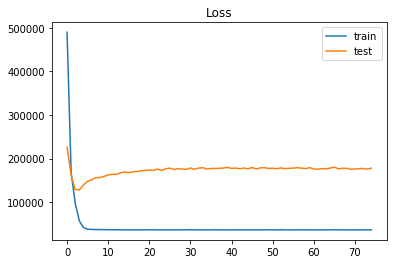

In [62]:
_, train_mse = model.evaluate(X_train, Y_train, verbose=0)
_, test_mse = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.figure()
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(['train', 'test'], loc='best')

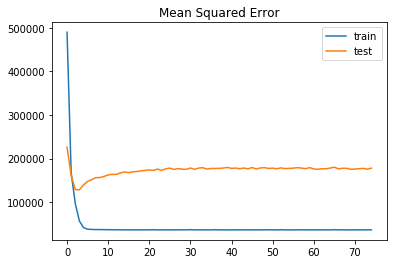

In [63]:
# plot mse during training
plt.figure()
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend(['train', 'test'], loc='best')
plt.show()

##### Graph shows how well predicted values match expected values using linear activation

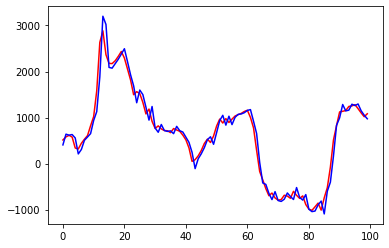

In [64]:
ds = dataset[:,3]
trPred = trainPredict[:,0]
tePred = testPredict[:,0]
plt.plot(ds[split_mark:split_mark+100], color = 'red')
#plt.plot(ds[split_mark-200:-1])
plt.plot(tePred[0:100], color = 'blue')
plt.show()

##### Second MLP: Softmax Activation

In [65]:
model = Sequential()
model.add(Dense(12, activation = 'softmax', input_dim = 3))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [66]:
history = model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs = 75, verbose = 0)

In [67]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

Train: 1653166.125, Test: 1298369.750


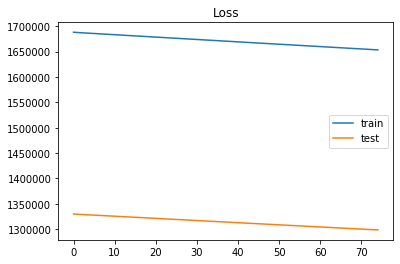

In [69]:
_, train_mse = model.evaluate(X_train, Y_train, verbose=0)
_, test_mse = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.figure()
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(['train', 'test'], loc='best')

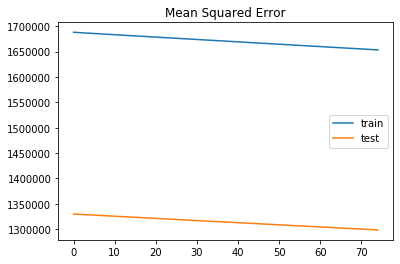

In [71]:
# plot mse during training
plt.figure()
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend(['train', 'test'], loc='best')
plt.show()

##### Graph shows how well predicted values match expected values using softmax activation

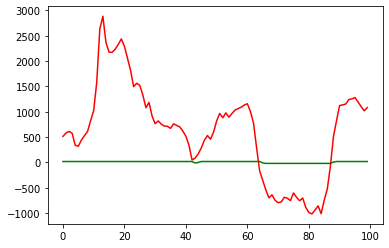

In [72]:
ds = dataset[:,3]
trPred = trainPredict[:,0]
tePred = testPredict[:,0]
plt.plot(ds[split_mark:split_mark+100], color = 'red')
#plt.plot(ds[split_mark-200:-1])
plt.plot(tePred[0:100], color = 'green')
plt.show()

##### Third MLP: ReLu Activation

In [73]:
model = Sequential()
model.add(Dense(12, activation = 'relu', input_dim = 3))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [74]:
history = model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs = 75, verbose = 0)

In [75]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

Train: 36113.219, Test: 183110.625


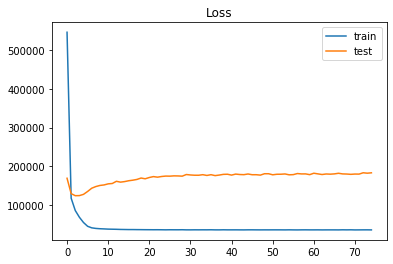

In [77]:
_, train_mse = model.evaluate(X_train, Y_train, verbose=0)
_, test_mse = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.figure()
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(['train', 'test'], loc='best')

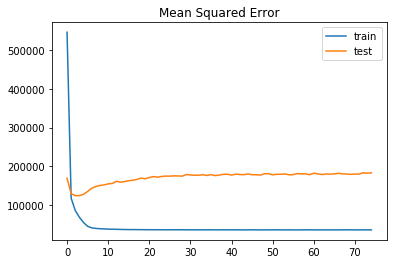

In [79]:
# plot mse during training
plt.figure()
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend(['train', 'test'], loc='best')
plt.show()

##### Graph shows how well predicted values match expected values using linear activation

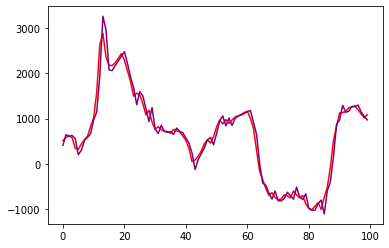

In [80]:
ds = dataset[:,3]
trPred = trainPredict[:,0]
tePred = testPredict[:,0]
plt.plot(ds[split_mark:split_mark+100], color = 'red')
#plt.plot(ds[split_mark-200:-1])
plt.plot(tePred[0:100], color = 'purple')
plt.show()

##### For my MLP models, linear and ReLu activation functions seem to have fit the data much better than softmax

#### LSTM

In [81]:
from keras.layers import LSTM
from keras.layers import Dropout
from time import time

In [82]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)

(8296, 3, 1)


In [83]:
model = Sequential()

model.add(LSTM(16, return_sequences=True, input_shape=(X_train.shape[1],1)))
#model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 16)             1152      
_________________________________________________________________
dense_6 (Dense)              (None, 3, 1)              17        
_________________________________________________________________
activation (Activation)      (None, 3, 1)              0         
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [84]:
startTime = time()
history = model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs = 75, verbose = 0)

print('\n Elapsed time: %.3f seconds' % (time() - startTime))


 Elapsed time: 50.051 seconds


In [85]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

Train: 1491310.375, Test: 1149932.750


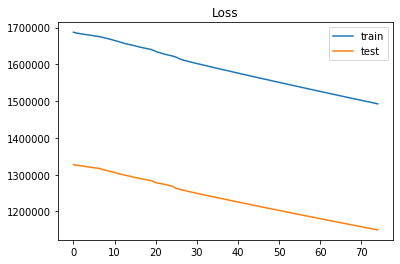

In [86]:
_, train_mse = model.evaluate(X_train, Y_train, verbose=0)
_, test_mse = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.figure()
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(['train', 'test'], loc='best')

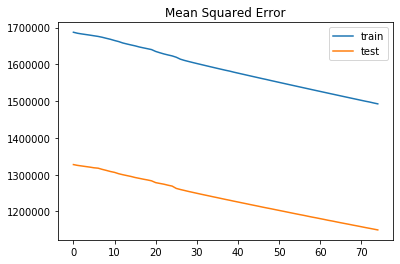

In [87]:
# plot mse during training
plt.figure()
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend(['train', 'test'], loc='best')
plt.show()

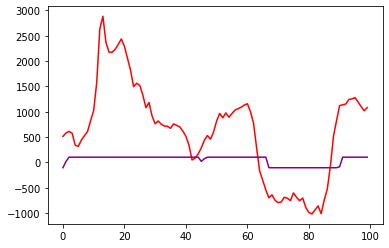

In [88]:
ds = dataset[:,3]
trPred = trainPredict[:,0]
tePred = testPredict[:,0]
plt.plot(ds[split_mark:split_mark+100], color = 'red')
#plt.plot(ds[split_mark-200:-1])
plt.plot(tePred[0:100], color = 'purple')
plt.show()

##### As seen in the graph, LSTM model did not fit our data well at all, the changes were either delayed or completely inaccurate

##### References used are all from https://machinelearningmastery.com/, I found the many examples really helpful to understand how to create and manipulate the data and neural networks